In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

# 1. Data Collection 

#### Collecting the data from yahoo finance

In [2]:
# set current date time
now = datetime.now()

#ticker is symbol of the stock
#download data from yfinance
start = datetime(now.year - 10, now.month, now.day)
end = now
ticker = 'AAPL'
df = yf.download(ticker, start, end)
print(df)

[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2016-01-29   21.947142   21.947142   21.272990   21.372197  257666000
2016-02-01   21.741972   21.805103   21.509739   21.750991  163774000
2016-02-02   21.302305   21.654036   21.257210   21.514245  149428800
2016-02-03   21.723932   21.834412   21.212119   21.419550  183857200
2016-02-04   21.898487   22.063973   21.578852   21.730735  185886800
...                ...         ...         ...         ...        ...
2026-01-22  248.350006  251.000000  248.149994  249.199997   39708300
2026-01-23  248.039993  249.410004  244.679993  247.320007   41689000
2026-01-26  255.410004  256.559998  249.800003  251.479996   55969200
2026-01-27  258.269989  261.950012  258.209991  259.170013   49648300
2026-01-28  256.440002  258.859985  254.509995  257.649994   41147100

[2514 rows x 5 colu

In [3]:
df.head()


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2016-01-29,21.947142,21.947142,21.272990,21.372197,257666000
2016-02-01,21.741972,21.805103,21.509739,21.750991,163774000
2016-02-02,21.302305,21.654036,21.257210,21.514245,149428800
2016-02-03,21.723932,21.834412,21.212119,21.419550,183857200
2016-02-04,21.898487,22.063973,21.578852,21.730735,185886800


In [4]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2026-01-22,248.350006,251.000000,248.149994,249.199997,39708300
2026-01-23,248.039993,249.410004,244.679993,247.320007,41689000
2026-01-26,255.410004,256.559998,249.800003,251.479996,55969200
2026-01-27,258.269989,261.950012,258.209991,259.170013,49648300
2026-01-28,256.440002,258.859985,254.509995,257.649994,41147100


# 2. Data Exploration and Visualization

In [5]:
df.shape

(2514, 5)

In [6]:
# describe function displays statistical overview of the dataframe
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,2514.000000,2514.000000,2514.000000,2514.000000,2.514000e+03
mean,115.976398,117.127897,114.715841,115.872868,1.002056e+08
std,73.918463,74.627125,73.150878,73.862425,5.603513e+07
min,20.604076,20.907412,20.405654,20.526531,1.791060e+07
25%,41.949592,42.340514,41.678768,41.976037,6.083100e+07
50%,122.254929,123.383824,120.890974,121.976696,8.800655e+07
75%,172.343407,174.602786,171.103343,172.471684,1.224193e+08
max,286.190002,288.619995,283.299988,286.200012,4.584084e+08


In [7]:
# resetting index insted of the date
df = df.reset_index()

In [8]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2016-01-29,21.947142,21.947142,21.272990,21.372197,257666000
1,2016-02-01,21.741972,21.805103,21.509739,21.750991,163774000
2,2016-02-02,21.302305,21.654036,21.257210,21.514245,149428800
3,2016-02-03,21.723932,21.834412,21.212119,21.419550,183857200
4,2016-02-04,21.898487,22.063973,21.578852,21.730735,185886800


In [9]:
# check for null values in datasets
df.isna().sum()

Price   Ticker
Date              0
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

Text(0, 0.5, 'Close Price')

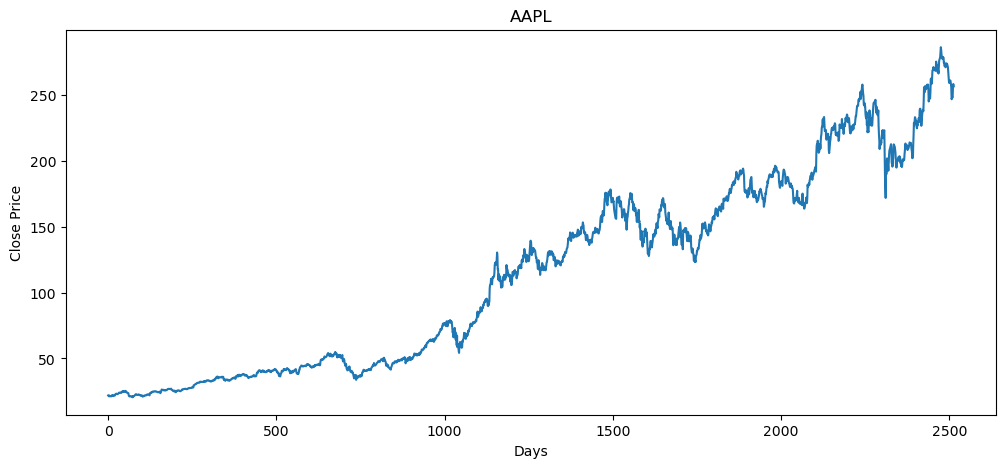

In [10]:
#plot or visualize
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.title(ticker)
plt.xlabel("Days")
plt.ylabel("Close Price")

# 3. Feature Engineering

In [11]:
#stock values are identified by moving average
temp_df = [10,20,30,40,50,60,70,80,90,100]
print(sum(temp_df[2:7])/5)

50.0


In [12]:
df1 = pd.DataFrame(temp_df)

In [13]:
#calculate moving average using rolling function
df1['Moving avg5'] = df1.rolling(5).mean()

In [14]:
df1.tail()


,0,Moving avg5
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


#### moving average of 100 days stock value from data set


In [15]:
df['MA_100'] = df.Close.rolling(100).mean()

In [16]:
df.head(103)

Price,Date,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2016-01-29,21.947142,21.947142,21.272990,21.372197,257666000,NaN
1,2016-02-01,21.741972,21.805103,21.509739,21.750991,163774000,NaN
2,2016-02-02,21.302305,21.654036,21.257210,21.514245,149428800,NaN
3,2016-02-03,21.723932,21.834412,21.212119,21.419550,183857200,NaN
4,2016-02-04,21.898487,22.063973,21.578852,21.730735,185886800,NaN
...,...,...,...,...,...,...,...
98,2016-06-20,21.689707,22.024974,21.673742,21.894973,137647600,NaN
99,2016-06-21,21.874447,21.974798,21.593917,21.653216,142185600,22.724584
100,2016-06-22,21.792336,22.097952,21.746720,21.951986,116876400,22.723036


Text(0, 0.5, 'Price')

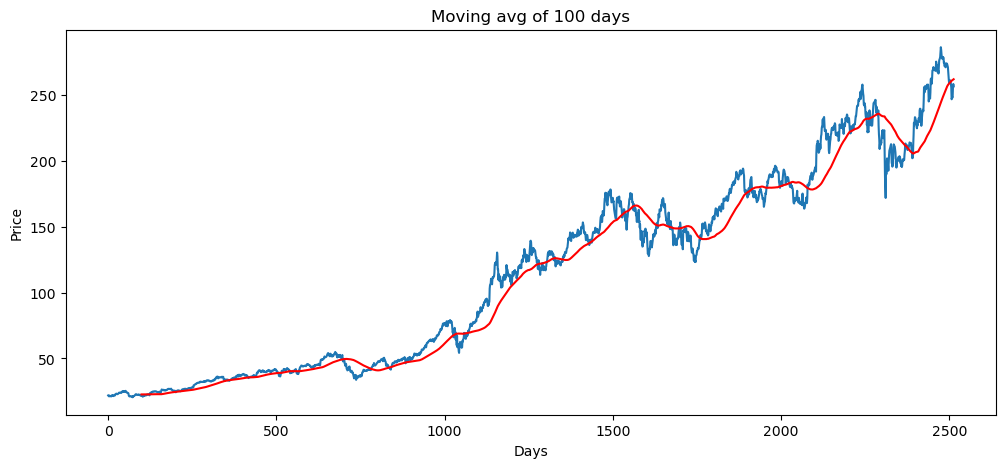

In [17]:
#plotting in graph
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.plot(df['MA_100'],'r')
plt.title("Moving avg of 100 days")
plt.xlabel("Days")
plt.ylabel("Price")


#### 200 days moving average

In [18]:
df['MA_200'] = df.Close.rolling(200).mean()
df.head(203)

Price,Date,Close,High,Low,Open,Volume,MA_100,MA_200
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,,
0,2016-01-29,21.947142,21.947142,21.272990,21.372197,257666000,NaN,NaN
1,2016-02-01,21.741972,21.805103,21.509739,21.750991,163774000,NaN,NaN
2,2016-02-02,21.302305,21.654036,21.257210,21.514245,149428800,NaN,NaN
3,2016-02-03,21.723932,21.834412,21.212119,21.419550,183857200,NaN,NaN
4,2016-02-04,21.898487,22.063973,21.578852,21.730735,185886800,NaN,NaN
...,...,...,...,...,...,...,...,...
198,2016-11-09,25.556225,25.657639,24.903952,25.325739,236705600,24.587327,NaN
199,2016-11-10,24.844021,25.604622,24.392270,25.604622,228538000,24.617023,23.670803
200,2016-11-11,24.991535,25.092949,24.558223,24.689600,136575600,24.649015,23.686025


Text(0, 0.5, 'Price')

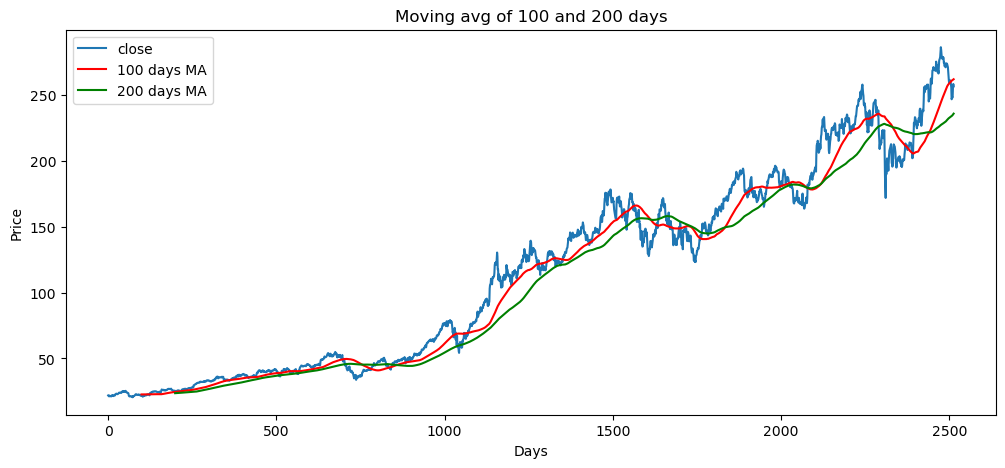

In [19]:
plt.figure(figsize=(12,5))
plt.plot(df.Close, label = 'close')
plt.plot(df['MA_100'],'r', label='100 days MA')
plt.plot(df['MA_200'], 'g', label='200 days MA')
plt.legend()
plt.title("Moving avg of 100 and 200 days")
plt.xlabel("Days")
plt.ylabel("Price")

#### percentage changed in each trading session

In [20]:
df['Percentage Change'] = df.Close.pct_change()

In [21]:
df['Percentage Change']

0            NaN
1      -0.009348
2      -0.020222
3       0.019793
4       0.008035
          ...   
2509    0.002827
2510   -0.001248
2511    0.029713
2512    0.011198
2513   -0.007086
Name: Percentage Change, Length: 2514, dtype: float64

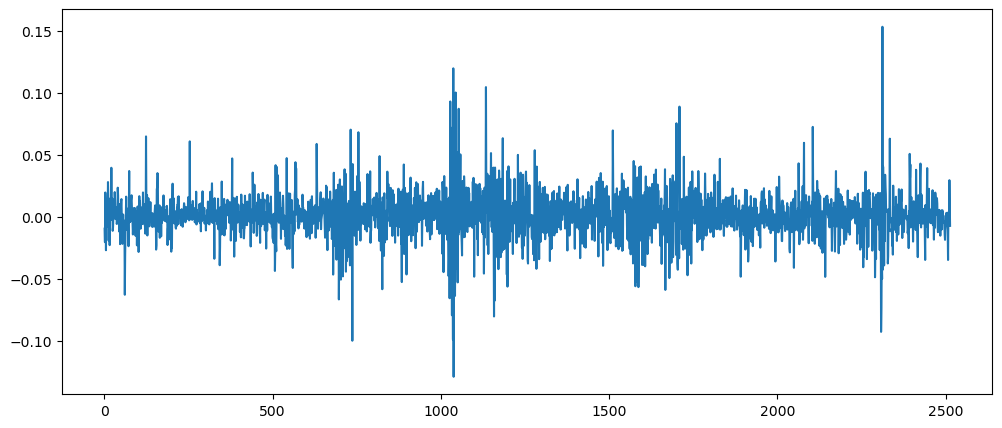

In [22]:
plt.figure(figsize=(12,5))
plt.plot(df['Percentage Change'])

# 4. Data Preprocessing using SKLearn

In [23]:
# splitting data into training and testing data sets
#this is 70% data
data_training = pd.DataFrame(df.Close[:int(len(df)*0.7)])
# 30% data
data_testing = pd.DataFrame(df.Close[int(len(df)*0.7):int(len(df))])

In [24]:
data_training

Ticker,AAPL
0,21.947142
1,21.741972
2,21.302305
3,21.723932
4,21.898487
...,...
1754,133.200516
1755,133.259613
1756,135.820969
1757,139.012833


In [25]:
data_testing

Ticker,AAPL
1759,139.751663
1760,141.820480
1761,143.761169
1762,140.874756
1763,142.145554
...,...
2509,248.350006
2510,248.039993
2511,255.410004
2512,258.269989


In [26]:
# scaling data between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [27]:
data_training_array = scaler.fit_transform(data_training)

In [28]:
data_training_array

array([[0.00851841],
       [0.00721712],
       [0.00442852],
       ...,
       [0.73076447],
       [0.7510089 ],
       [0.75988112]])

# 5. Sequence Creation

##### LSTM model require the data should be in sequential manner

In [29]:
# x_train is the input and y_train is predicted output
#feed 100 sequencial data to the model to learn


In [30]:
x_train = []
y_train = []

In [31]:
for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100 : i])
    y_train.append(data_training_array[i, 0]) #here [i=row, 0=column]

x_train, y_train = np.array(x_train), np.array(y_train)

In [32]:
x_train

array([[[0.00851841],
        [0.00721712],
        [0.00442852],
        ...,
        [0.00721834],
        [0.00688562],
        [0.00805734]],

       [[0.00721712],
        [0.00442852],
        [0.0071027 ],
        ...,
        [0.00688562],
        [0.00805734],
        [0.00753655]],

       [[0.00442852],
        [0.0071027 ],
        [0.00820981],
        ...,
        [0.00805734],
        [0.00753655],
        [0.00833212]],

       ...,

       [[0.88996387],
        [0.87599081],
        [0.8605833 ],
        ...,
        [0.71870541],
        [0.71414422],
        [0.71451904]],

       [[0.87599081],
        [0.8605833 ],
        [0.85004135],
        ...,
        [0.71414422],
        [0.71451904],
        [0.73076447]],

       [[0.8605833 ],
        [0.85004135],
        [0.85465723],
        ...,
        [0.71451904],
        [0.73076447],
        [0.7510089 ]]])

# 6. Model Building.

##### Using TensorFlow ==> It is a framework for numerical computation, provides various tools for training, deploying deep learning models
##### Keras is highlevel api for neural network 

In [33]:
import tensorflow as tf
print(tf.__version__)

2.20.0


In [34]:
# ML Model:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input

In [36]:
model = Sequential()

model.add(Input(shape=(100, 1)))
model.add(LSTM( units = 128, activation = 'tanh', return_sequences=True))
model.add(LSTM( units = 64 ))
model.add(Dense( 25 ))
model.add(Dense( 1 ))

# 7. Model Training and save trained model

In [37]:
# compile model using optimizer called 'adam'(algorithm for optimizing )
model.compile( optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50) # epochs is like reading data how many times

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 14s 70ms/step - loss: 0.0185
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 7.4212e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 6.8823e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 6.4900e-04
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - loss: 7.0529e-04
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - loss: 6.1594e-04
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - loss: 6.3341e-04
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - loss: 5.5479e-04
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - loss: 5.6363e-04
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - loss: 4.9809e-04
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - loss: 4.9811e-04
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - loss: 4.7796e-04
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - loss: 5.0448e-04
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - loss: 6.1709e-04
Epoch 15/50
52/52 

In [38]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [40]:
#saving the trained model
model.save('stock_prediction_model.keras')

# 8. Preparing the Test Data

##### By using 30% of the data

In [41]:
# we need last hundred days data 
past_hundred_data = data_training.tail(100)

In [45]:
#concat with test data
final_df = pd.concat([past_hundred_data, data_testing], ignore_index=True)

In [46]:
final_df

Ticker,AAPL
0,154.626907
1,155.354675
2,153.240128
3,151.981262
4,153.387680
...,...
850,248.350006
851,248.039993
852,255.410004
853,258.269989


In [47]:
#scaling the data between 0 and 1
input_data = scaler.fit_transform(final_df)
input_data

array([[1.93003374e-01],
       [1.97467440e-01],
       [1.84496987e-01],
       [1.76775216e-01],
       [1.85402061e-01],
       [1.76352817e-01],
       [1.93908261e-01],
       [2.30466332e-01],
       [1.72612436e-01],
       [1.81480759e-01],
       [1.63744394e-01],
       [1.53669711e-01],
       [1.76473649e-01],
       [1.91072580e-01],
       [1.71888658e-01],
       [1.65976754e-01],
       [1.52040858e-01],
       [1.54092204e-01],
       [1.60064196e-01],
       [1.48481492e-01],
       [1.04080630e-01],
       [7.82602771e-02],
       [1.03899616e-01],
       [1.25918938e-01],
       [1.27728806e-01],
       [1.21877178e-01],
       [8.96621527e-02],
       [9.16533160e-02],
       [8.29660077e-02],
       [7.91050754e-02],
       [1.07157415e-01],
       [7.93463661e-02],
       [1.03658325e-01],
       [1.11742126e-01],
       [1.12405815e-01],
       [1.09570509e-01],
       [1.32977581e-01],
       [1.46128861e-01],
       [1.63563473e-01],
       [1.45525634e-01],


In [48]:
input_data.shape

(855, 1)

In [49]:
#creating sequence
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100 : i])
    y_test.append(input_data[i, 0])



In [50]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [56]:
x_test

array([[[0.19300337],
        [0.19746744],
        [0.18449699],
        ...,
        [0.07764938],
        [0.09722799],
        [0.10580841]],

       [[0.19746744],
        [0.18449699],
        [0.17677522],
        ...,
        [0.09722799],
        [0.10580841],
        [0.10175992]],

       [[0.18449699],
        [0.17677522],
        [0.18540206],
        ...,
        [0.10580841],
        [0.10175992],
        [0.11444986]],

       ...,

       [[0.65225327],
        [0.70587307],
        [0.71390062],
        ...,
        [0.76359893],
        [0.76789274],
        [0.76599115]],

       [[0.70587307],
        [0.71390062],
        [0.71334915],
        ...,
        [0.76789274],
        [0.76599115],
        [0.81119815]],

       [[0.71390062],
        [0.71334915],
        [0.70225755],
        ...,
        [0.76599115],
        [0.81119815],
        [0.82874106]]])

# 9. Making Predictions

In [57]:
y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


In [58]:
y_predicted

array([[0.08805678],
       [0.09552625],
       [0.1033406 ],
       [0.11247499],
       [0.11411077],
       [0.11545172],
       [0.11836812],
       [0.13075635],
       [0.14922854],
       [0.15846264],
       [0.16789746],
       [0.16880742],
       [0.16517034],
       [0.1623548 ],
       [0.16634417],
       [0.16964802],
       [0.17609787],
       [0.17802769],
       [0.17588875],
       [0.16541633],
       [0.15727952],
       [0.15332109],
       [0.14667523],
       [0.1438177 ],
       [0.14188051],
       [0.13690943],
       [0.1337694 ],
       [0.14151216],
       [0.15523154],
       [0.16198817],
       [0.16706774],
       [0.16538289],
       [0.15839347],
       [0.15614384],
       [0.15998173],
       [0.16509008],
       [0.17466494],
       [0.18059579],
       [0.18849513],
       [0.19806966],
       [0.20172322],
       [0.20493284],
       [0.20967814],
       [0.20897362],
       [0.20598167],
       [0.21018383],
       [0.21813804],
       [0.229

In [59]:
# need to revert the scaled data into original data to see the difference between prediction and actual, this is known as "Inverse Transform"
y_predicted = scaler.inverse_transform(y_predicted.reshape(-1, 1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

In [60]:
y_predicted

array([137.51767, 138.7354 , 140.00937, 141.49852, 141.7652 , 141.98381,
       142.45927, 144.4789 , 147.49039, 148.9958 , 150.53394, 150.6823 ,
       150.08934, 149.63034, 150.2807 , 150.81934, 151.87083, 152.18546,
       151.83675, 150.12946, 148.80292, 148.15758, 147.07411, 146.60826,
       146.29245, 145.48203, 144.97011, 146.23239, 148.46904, 149.57056,
       150.39868, 150.124  , 148.98453, 148.61777, 149.24345, 150.07626,
       151.63724, 152.60413, 153.89194, 155.45287, 156.0485 , 156.57175,
       157.34537, 157.23051, 156.74274, 157.42781, 158.72456, 160.6375 ,
       162.48177, 163.4291 , 163.10985, 162.94666, 161.91924, 160.66876,
       159.60648, 160.94693, 162.25311, 163.10158, 163.97346, 164.93387,
       165.16504, 164.52417, 164.0488 , 163.21875, 162.64319, 164.07112,
       165.91548, 167.1378 , 167.33249, 166.78584, 165.6511 , 167.80052,
       169.83524, 170.38885, 171.10033, 171.6153 , 171.50395, 171.11604,
       170.84187, 170.96857, 172.0933 , 173.0319 , 

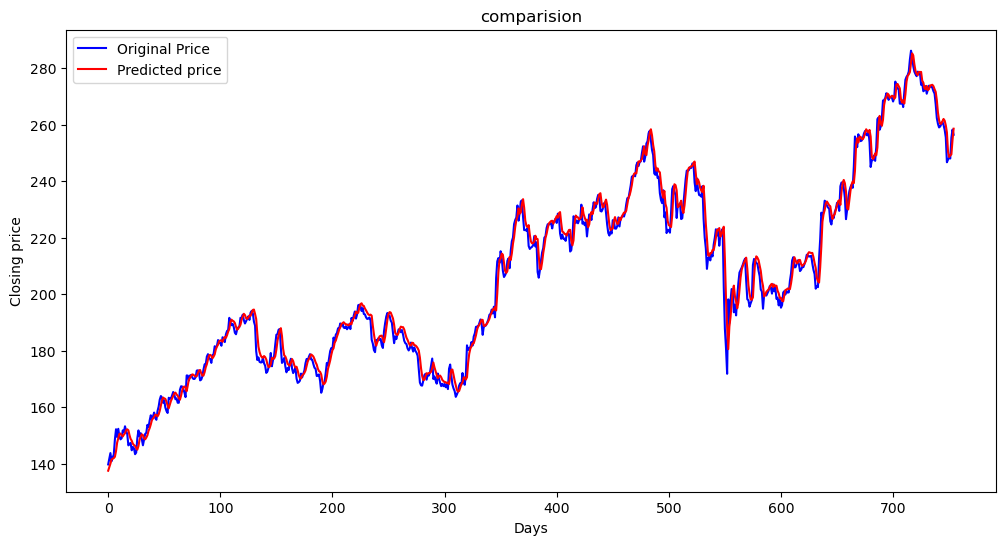

In [61]:
# compare original and predicted values by plotting graph
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted price')
plt.title('comparision')
plt.xlabel('Days')
plt.ylabel("Closing price")
plt.legend()

(180.0, 260.0)

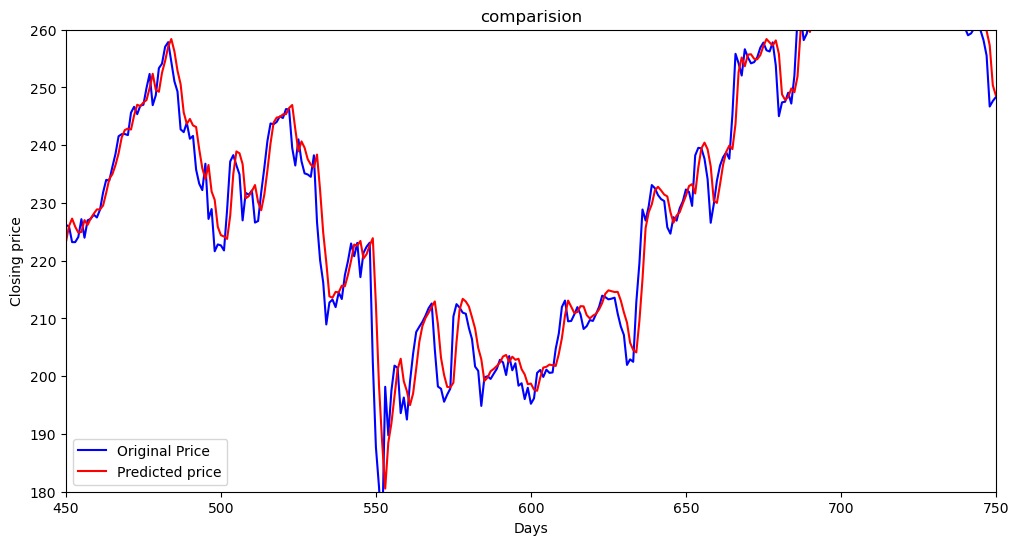

In [63]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted price')
plt.title('comparision')
plt.xlabel('Days')
plt.ylabel("Closing price")
plt.legend()
plt.xlim(450, 750)
plt.ylim(180,260)

# 10. Model Evaluation

In [64]:
# using 3 matrices

In [68]:
from sklearn.metrics import mean_squared_error, r2_score

In [69]:
# 1. MSE => Mean Squared Error =>measures average square diff b/w actual and predicted, lower mse = good model
mse = mean_squared_error(y_test, y_predicted)
print(f'Mean squared error : {mse}')

Mean squared error : 14.480329365976809


In [70]:
# Root mean squared error(RMSE) ; lower rmse = good model
rmse = np.sqrt(mse)
print(f'Root Mean squared error : {rmse}')

Root Mean squared error : 3.8053027955705194


In [71]:
# R-Squared
r2 = r2_score(y_test, y_predicted)
print(f'R2- squared : {r2}') # closer to 1 means good prediction

R2- squared : 0.9872977178923186
